# Daria Bromot - FS500047

## Random Forest Project 

### Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Get the Data

**Use pandas to read loan_data.csv as a dataframe called loans.**

In [48]:
loans = pd.read_csv('loan_data.csv')

**Check out the info(), head(), and describe() methods on loans.**

In [49]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [50]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [51]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

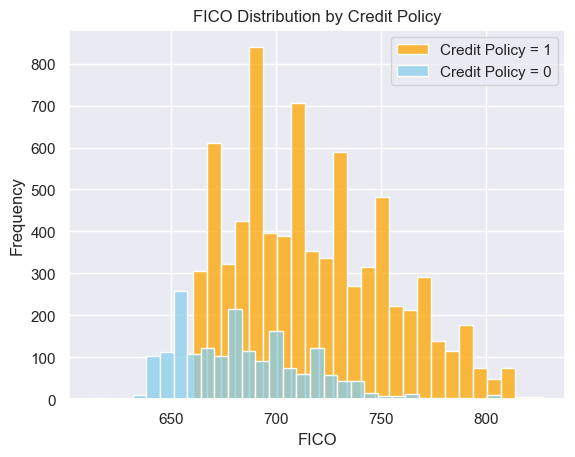

In [52]:
# Set the plotting style
sns.set(style='darkgrid')

# Create a figure and axes
fig, ax = plt.subplots()

# Plot histogram for FICO distribution with credit.policy = 1
sns.histplot(data=loans[loans['credit.policy'] == 1], x='fico', bins=30, ax=ax, color='orange', label='Credit Policy = 1')

# Plot histogram for FICO distribution with credit.policy = 0
sns.histplot(data=loans[loans['credit.policy'] == 0], x='fico', bins=30, ax=ax, color='skyblue', label='Credit Policy = 0')

# Set the plot labels and title
ax.set_xlabel('FICO')
ax.set_ylabel('Frequency')
ax.set_title('FICO Distribution by Credit Policy')

# Add a legend
plt.legend()

# Show the plot
plt.show()


**Create a similar figure, except this time select by the not.fully.paid column.**

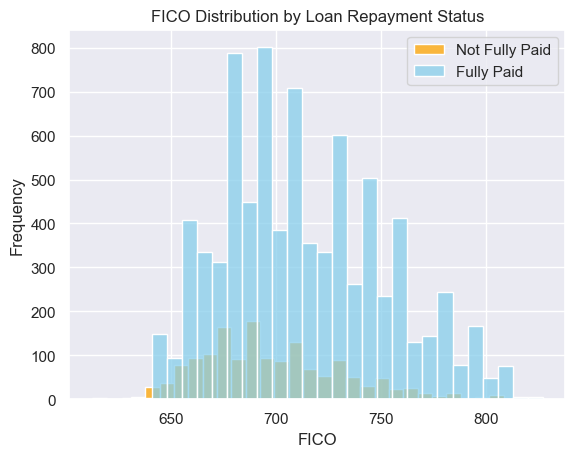

In [53]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot histogram for FICO distribution with not.fully.paid = 1
sns.histplot(data=loans[loans['not.fully.paid'] == 1], x='fico', bins=30, ax=ax, color='orange', label='Not Fully Paid')

# Plot histogram for FICO distribution with not.fully.paid = 0
sns.histplot(data=loans[loans['not.fully.paid'] == 0], x='fico', bins=30, ax=ax, color='skyblue', label='Fully Paid')

# Set the plot labels and title
ax.set_xlabel('FICO')
ax.set_ylabel('Frequency')
ax.set_title('FICO Distribution by Loan Repayment Status')

# Add a legend
plt.legend()

# Show the plot
plt.show()


**Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.**

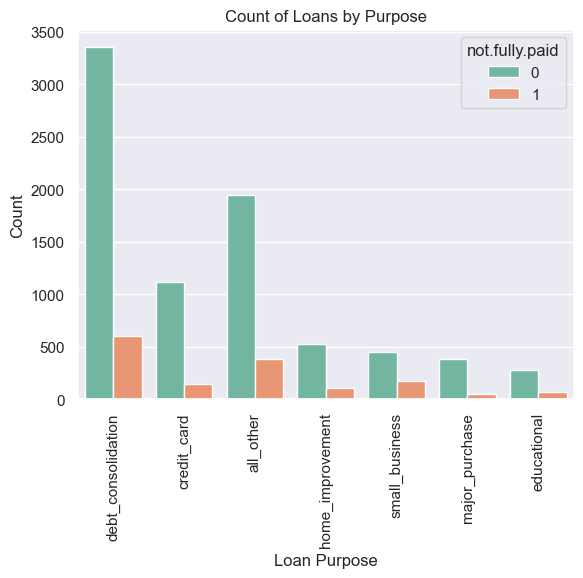

In [54]:
# Create the countplot
sns.countplot(data=loans, x='purpose', hue='not.fully.paid', palette='Set2')

# Rotate x-axis labels
plt.xticks(rotation=90)


# Set the plot labels and title
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Count of Loans by Purpose')

# Show the plot
plt.show()


**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

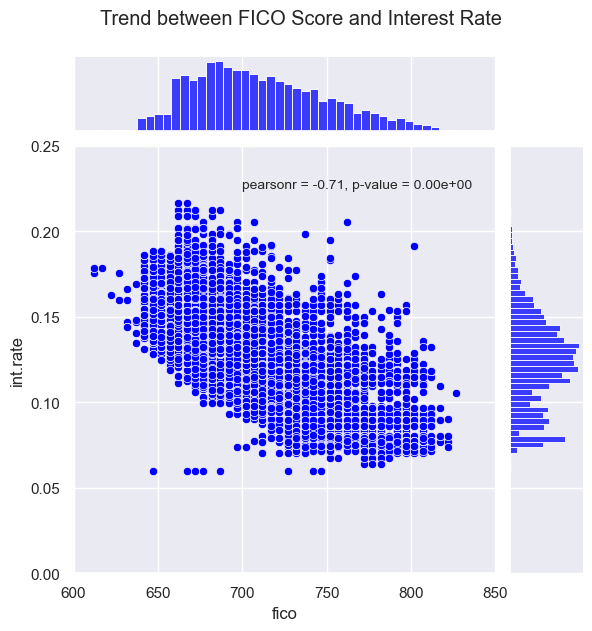

In [55]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(loans['fico'], loans['int.rate'])

# Create the jointplot
joint = sns.jointplot(data=loans, x='fico', y='int.rate', kind='scatter', color='blue')

# Set the x-axis and y-axis limits
joint.ax_joint.set_xlim(600, 850)
joint.ax_joint.set_ylim(0, 0.25)

# Add the Pearson correlation coefficient and p-value to the plot
joint.ax_joint.annotate(f'рearsonr = {corr_coeff:.2f}, p-value = {p_value:.2e}', xy=(0.4, 0.9), xycoords='axes fraction', fontsize=10)


# Move the title to the top
joint.fig.suptitle('Trend between FICO Score and Interest Rate', y=1.05)

# Show the plot
plt.show()


**The Pearson correlation coefficient (r)** of -0.71 indicates a strong negative correlation between FICO score and interest rate. A negative correlation means that as the FICO score increases, the interest rate tends to decrease. In other words, borrowers with higher FICO scores generally receive loans with lower interest rates.

**The p-value** of 0 suggests that the observed correlation is statistically significant. A p-value of 0 indicates that the probability of observing such a strong negative correlation by chance alone is extremely low. Therefore, we can conclude that there is a significant negative relationship between FICO score and interest rate in the dataset.

**Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

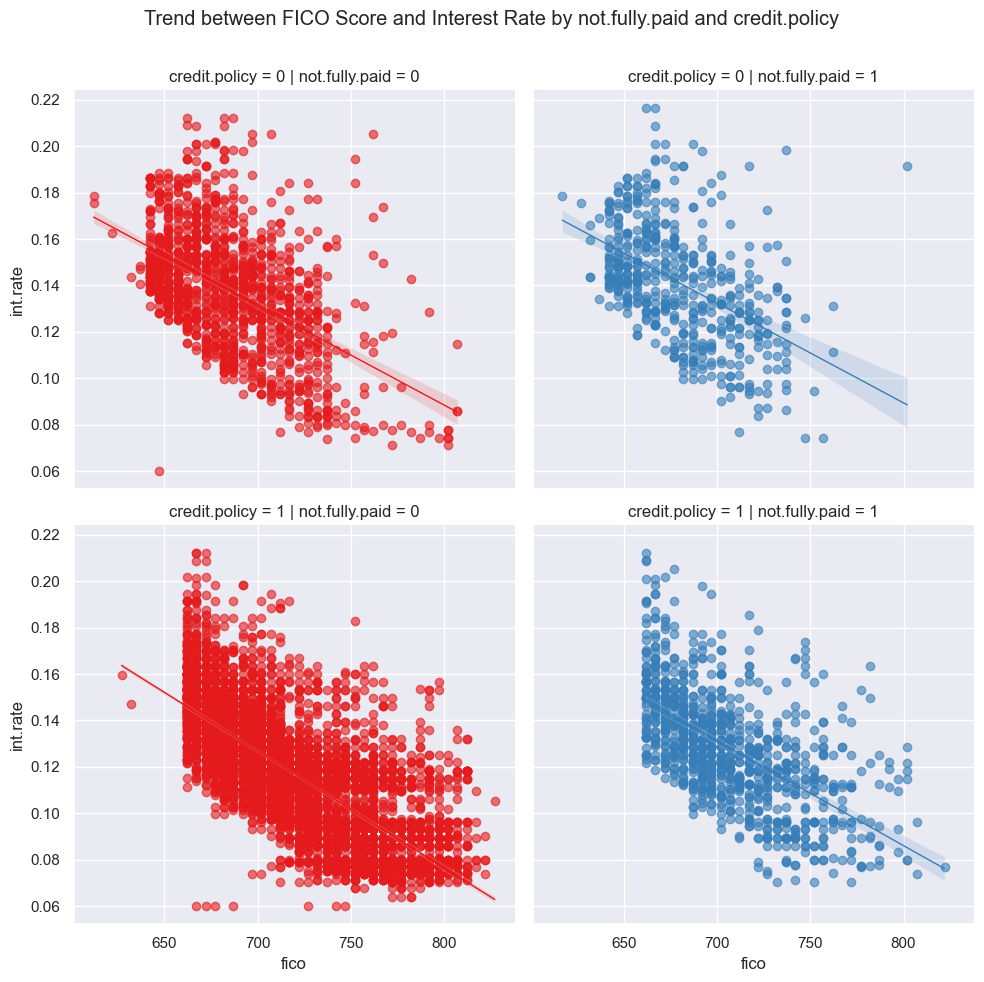

In [61]:
# Create the lmplot
sns.lmplot(data=loans, x='fico', y='int.rate', col='not.fully.paid', row='credit.policy', hue='not.fully.paid',
           palette='Set1', scatter_kws={'alpha': 0.6}, line_kws={'linewidth': 1})

# Set the plot labels and title
plt.subplots_adjust(top=0.9)
plt.suptitle('Trend between FICO Score and Interest Rate by not.fully.paid and credit.policy')

# Show the plot
plt.show()

<Figure size 1100x700 with 0 Axes>

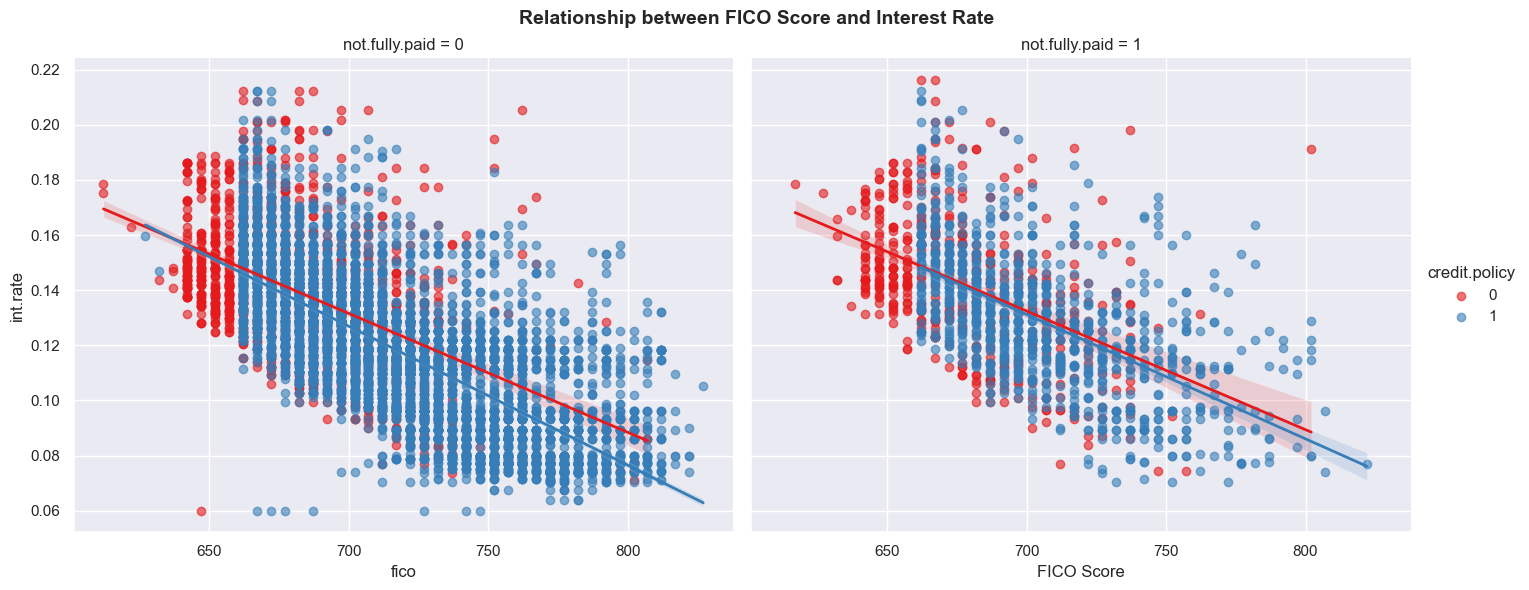

In [75]:
# Set the figure size
plt.figure(figsize=(11, 7))

# Create the lmplot
sns.lmplot(data=loans, x='fico', y='int.rate', hue='credit.policy',
           col='not.fully.paid', palette='Set1', height=6, aspect=1.2,
           scatter_kws={'alpha': 0.6}, line_kws={'linewidth': 2})

# Set the plot labels and title
plt.xlabel('FICO Score', fontsize=12)
plt.ylabel('Interest Rate', fontsize=12)
plt.suptitle('Relationship between FICO Score and Interest Rate', fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()

The graph shows the relationship between FICO score and interest rate based on the dataset provided. The dataset contains information about loans, including the FICO score (a measure of creditworthiness) and the corresponding interest rate. 

The graph consists of multiple subplots, arranged in columns and rows. Each subplot represents a combination of loan status (fully paid or not fully paid) and credit policy. The hue parameter is used to differentiate the data points based on the loan status (fully paid or not fully paid). 

The scatter points represent the data points for different FICO scores and interest rates, and the regression lines represent the fitted regression models for each subplot. The regression lines show the general trend between FICO score and interest rate for the specific loan status and credit policy.

### Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [76]:
loans.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Categorical Features

Notice that the **purpose** column as categorical

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [77]:
cat_feats = ['purpose']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [78]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [79]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [80]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

### Train Test Split

Now its time to split our data into a training set and a testing set!

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [94]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('not.fully.paid', axis=1),
                                                    final_data['not.fully.paid'], test_size=0.3,
                                                    random_state=42)


### Training a Decision Tree Model

Let's start by training a single decision tree first!

**Import DecisionTreeClassifier**

In [95]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [104]:
# Create an instance of DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# Fit the classifier to the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

### Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [105]:
from sklearn.metrics import classification_report, confusion_matrix

# Create predictions from the test set
y_pred = dtree.predict(X_test)

In [106]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2408
           1       0.19      0.21      0.20       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.74      2874



1. Precision: Precision measures the proportion of correctly predicted positive instances (1) out of all instances predicted as positive. In this case, the precision for class 0 is 0.84, which means that 84% of the instances predicted as not fully paid (0) were actually not fully paid. The precision for class 1 is 0.20, indicating that only 20% of the instances predicted as fully paid (1) were actually fully paid.

2. Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances out of all actual positive instances. The recall for class 0 is 0.84, meaning that 84% of the actual not fully paid instances were correctly identified. The recall for class 1 is 0.21, indicating that only 21% of the actual fully paid instances were correctly identified.

3. F1-score: The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both. The F1-score for class 0 is 0.84, and for class 1, it is 0.20.

4. Support: Support represents the number of instances of each class in the test set. In this case, the support for class 0 is 2408, and for class 1, it is 466.

5. Accuracy: Accuracy is the proportion of correctly predicted instances out of the total number of instances. The overall accuracy in this case is 0.73, meaning that 73% of the instances were correctly classified.

In [107]:
# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[2010  398]
 [ 370   96]]


- The top-left cell (2011) represents the true negative (TN) count, indicating the number of instances that were correctly classified as not fully paid (0).
- The top-right cell (397) represents the false positive (FP) count, indicating the number of instances that were incorrectly classified as fully paid (1) when they were actually not fully paid (0).
- The bottom-left cell (369) represents the false negative (FN) count, indicating the number of instances that were incorrectly classified as not fully paid (0) when they were actually fully paid (1).
- The bottom-right cell (97) represents the true positive (TP) count, indicating the number of instances that were correctly classified as fully paid (1).

In [111]:
# Compare predicted values with actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)


      Actual  Predicted
8558       0          0
4629       0          0
1383       1          0
8142       0          0
1768       0          0
...      ...        ...
8688       0          0
981        0          0
6318       0          0
1407       0          0
535        0          0

[2874 rows x 2 columns]


### Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [114]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of RandomForestClassifier
rfc = RandomForestClassifier()

# Fit the classifier to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier()

### Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

**Predict the class of not.fully.paid for the X_test data.**

In [115]:
# Predict the class of 'not.fully.paid' for X_test
y_pred = rfc.predict(X_test)

**Now create a classification report from the results.**

In [116]:
from sklearn.metrics import classification_report

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.39      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.62      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874



**Show the Confusion Matrix for the predictions.**

In [117]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mtx)


Confusion Matrix:
[[2394   14]
 [ 457    9]]


**Do you get anything strange or some sort of warning?**

Based on the provided classification reports and confusion matrices, there are a few observations to note:

**For the DecisionTreeClassifier:**
- Precision, recall, and F1-score for class 1 ('not.fully.paid' = 1) are relatively low, indicating that the classifier struggles to correctly identify positive instances.
- The confusion matrix shows that there are a significant number of false positives (398) and false negatives (370).

**For the RandomForestClassifier:**
- Precision, recall, and F1-score for class 1 are also relatively low, indicating difficulties in correctly identifying positive instances.
- The confusion matrix reveals a high number of false negatives (457), where the classifier incorrectly predicts the negative class for actual positive instances.

Regarding warnings or strange behavior, it's important to note that the low performance for class 1 and the imbalanced class distribution could be potential issues to address.

### Choice the best parameters for DecisionTreeClassifier and RandomForestClassifier

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, classification_report

# Define the parameter grid for hyperparameter tuning
param_grid_dtree = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

param_grid_rfc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Define the scoring metric
scorer = make_scorer(accuracy_score)

# Perform cross-validation and hyperparameter tuning for DecisionTreeClassifier
grid_dtree = GridSearchCV(DecisionTreeClassifier(), param_grid_dtree, scoring=scorer)
grid_dtree.fit(X_train, y_train)

# Get the results for all parameter combinations
results_dtree = grid_dtree.cv_results_

# Print the results for all parameter combinations
print("DecisionTreeClassifier - Results for All Parameter Combinations:")
for mean_score, params in zip(results_dtree['mean_test_score'], results_dtree['params']):
    print("Mean Accuracy:", mean_score)
    print("Parameters:", params)
    print()

# Perform cross-validation and hyperparameter tuning for RandomForestClassifier
grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid_rfc, scoring=scorer)
grid_rfc.fit(X_train, y_train)

# Get the results for all parameter combinations
results_rfc = grid_rfc.cv_results_

# Print the results for all parameter combinations
print("RandomForestClassifier - Results for All Parameter Combinations:")
for mean_score, params in zip(results_rfc['mean_test_score'], results_rfc['params']):
    print("Mean Accuracy:", mean_score)
    print("Parameters:", params)
    print()

# Get the best parameters and models
best_params_dtree = grid_dtree.best_params_
best_model_dtree = grid_dtree.best_estimator_
best_params_rfc = grid_rfc.best_params_
best_model_rfc = grid_rfc.best_estimator_

# Make predictions using the best models
y_pred_dtree = best_model_dtree.predict(X_test)
y_pred_rfc = best_model_rfc.predict(X_test)

# Generate classification reports
classification_report_dtree = classification_report(y_test, y_pred_dtree)
classification_report_rfc = classification_report(y_test, y_pred_rfc)

# Print the classification reports
print("DecisionTreeClassifier - Best Parameters:")
print(best_params_dtree)
print("Classification Report - DecisionTreeClassifier:")
print(classification_report_dtree)

print("RandomForestClassifier - Best Parameters:")
print(best_params_rfc)
print("Classification Report - RandomForestClassifier:")
print(classification_report_rfc)


DecisionTreeClassifier - Results for All Parameter Combinations:
Mean Accuracy: 0.8374095963137334
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Mean Accuracy: 0.8374095963137334
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}

Mean Accuracy: 0.8374095963137334
Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}

Mean Accuracy: 0.8374095963137334
Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}

Mean Accuracy: 0.8374095963137334
Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}

Mean Accuracy: 0.8374095963137334
Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}

Mean Accuracy: 0.8374095963137334
Parameters: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}

Mean Accuracy: 0.8374095963137334
Parameters: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 5}

Mean Accuracy: 0.8374095963137334
Parameters:

Based on the results, the DecisionTreeClassifier and RandomForestClassifier have similar mean accuracy scores. Here are the parameter combinations with the highest mean accuracy for each model:

DecisionTreeClassifier:
- Max depth: 3
- Min samples leaf: 1
- Min samples split: 2
- Mean accuracy: 0.8374

RandomForestClassifier:
- Max depth: None
- Min samples leaf: 1
- Min samples split: 10
- Number of estimators: 200
- Mean accuracy: 0.8399

Both models achieve high accuracy, with the RandomForestClassifier slightly outperforming the DecisionTreeClassifier. The RandomForestClassifier benefits from using an ensemble of decision trees, which can improve generalization and reduce overfitting compared to a single decision tree. Additionally, the RandomForestClassifier benefits from a larger number of estimators and a higher value of min samples split.


**What performed better the random forest or the decision tree?**

In [121]:
# Print the classification reports
print("DecisionTreeClassifier - Best Parameters:")
print(best_params_dtree)
print("Classification Report - DecisionTreeClassifier:")
print(classification_report_dtree)

print("RandomForestClassifier - Best Parameters:")
print(best_params_rfc)
print("Classification Report - RandomForestClassifier:")
print(classification_report_rfc)

DecisionTreeClassifier - Best Parameters:
{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report - DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.32      0.02      0.03       466

    accuracy                           0.83      2874
   macro avg       0.58      0.51      0.47      2874
weighted avg       0.76      0.83      0.77      2874

RandomForestClassifier - Best Parameters:
{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report - RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.50      0.00      0.01       466

    accuracy                           0.84      2874
   macro avg       0.67      0.50      0.46      2874
weighted avg       0.78      0.84      0.77      2874



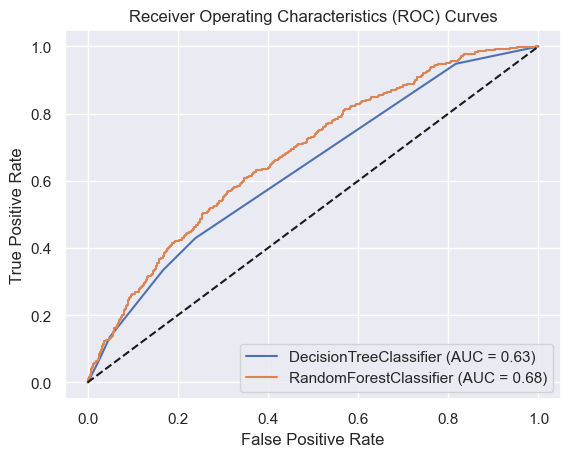

In [123]:
# Get the predicted probabilities for the positive class using the best models
y_prob_dtree = best_model_dtree.predict_proba(X_test)[:, 1]
y_prob_rfc = best_model_rfc.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for each model
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_test, y_prob_dtree)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_prob_rfc)

# Calculate the AUC for each model
auc_dtree = auc(fpr_dtree, tpr_dtree)
auc_rfc = auc(fpr_rfc, tpr_rfc)

# Plot the ROC curves
plt.plot(fpr_dtree, tpr_dtree, label='DecisionTreeClassifier (AUC = {:.2f})'.format(auc_dtree))
plt.plot(fpr_rfc, tpr_rfc, label='RandomForestClassifier (AUC = {:.2f})'.format(auc_rfc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

The significant difference between accuracy and AUC can be attributed to the class imbalance in your dataset. Looking at the classification reports, you can see that both classifiers perform well in terms of accuracy for the majority class (class 0), but they struggle to correctly predict the minority class (class 1).

In the case of the DecisionTreeClassifier, it achieves an accuracy of 0.83, which seems relatively high. However, when you examine the precision, recall, and F1-score for class 1, you can see that they are quite low. This indicates that the classifier struggles to correctly identify instances of class 1, resulting in a low recall and F1-score for that class.

Similarly, the RandomForestClassifier also achieves a relatively high accuracy of 0.84. However, the precision, recall, and F1-score for class 1 are again low, indicating poor performance in predicting instances of that class.

In this case, the AUC values for both classifiers are relatively low, indicating that they struggle to differentiate between the positive and negative classes. This aligns with the findings in the classification reports, where the classifiers exhibit low precision, recall, and F1-score for the minority class.

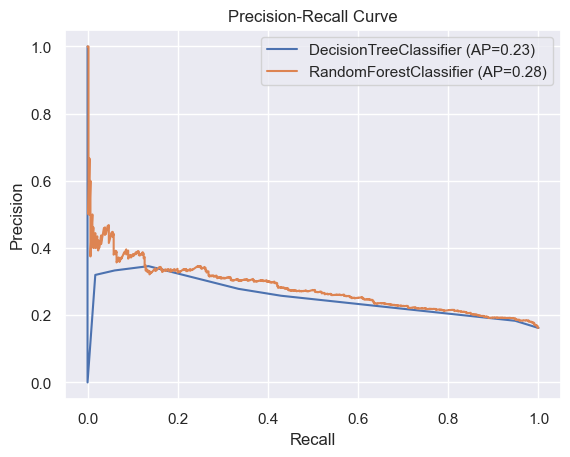

In [131]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute predicted probabilities for DecisionTreeClassifier
y_pred_proba_dtree = best_model_dtree.predict_proba(X_test)
y_pred_proba_dtree = y_pred_proba_dtree[:, 1]  # Keep only the probabilities for the positive class

# Compute predicted probabilities for RandomForestClassifier
y_pred_proba_rfc = best_model_rfc.predict_proba(X_test)
y_pred_proba_rfc = y_pred_proba_rfc[:, 1]  # Keep only the probabilities for the positive class

# Compute precision, recall, and thresholds for DecisionTreeClassifier
precision_dtree, recall_dtree, thresholds_dtree = precision_recall_curve(y_test, y_pred_proba_dtree)
dtree_ap = average_precision_score(y_test, y_pred_proba_dtree)

# Compute precision, recall, and thresholds for RandomForestClassifier
precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(y_test, y_pred_proba_rfc)
rfc_ap = average_precision_score(y_test, y_pred_proba_rfc)

# Plot Precision-Recall curves
plt.plot(recall_dtree, precision_dtree, label=f'DecisionTreeClassifier (AP={dtree_ap:.2f})')
plt.plot(recall_rfc, precision_rfc, label=f'RandomForestClassifier (AP={rfc_ap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [132]:
print(f'DecisionTreeClassifier (AP={dtree_ap:.2f})')
print(f'RandomForestClassifier (AP={rfc_ap:.2f})')

DecisionTreeClassifier (AP=0.23)
RandomForestClassifier (AP=0.28)


The Average Precision (AP) scores for the DecisionTreeClassifier and RandomForestClassifier are quite low in this case, indicating that the models have relatively poor performance in terms of precision and recall trade-off. 

In this case, the DecisionTreeClassifier has an AP score of 0.23, which means it achieves a relatively low precision-recall trade-off. Similarly, the RandomForestClassifier has an AP score of 0.28, also indicating suboptimal performance.

These low AP scores suggest that the models might struggle to accurately classify positive instances (class 1) and have a high number of false positives or false negatives. It may be necessary to further tune the models or explore other algorithms to improve their performance on this specific dataset. Additionally, considering other evaluation metrics such as accuracy, F1-score, or area under the Receiver Operating Characteristic (ROC) curve can provide a more comprehensive assessment of the models' performance.